In [222]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib.legend_handler import HandlerLine2D
import scipy as sp
import statsmodels.api as sm
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

# Exercise 1: Dimension reduction with PCA
### (1) Load the data in a DataFrame.

In [223]:
data = pd.read_csv('censusCrimeClean.csv')
data.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### (2) Since PCA only works with numerical data, extract all the data except the first column (which is text) and store as a variable.

In [224]:
crime = data.drop('communityname', axis=1)
crime.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### (3) Create and fit PCA with two components with these features

In [225]:
pca = PCA(n_components=2).fit(crime)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


[8.26130789 1.08655844]
[0.67387831 0.08863102]


### (4) Look at the explained_variance_ratio_
How much of the variation are these two components capturing? Try standardising the variables and see what effect that has. Standardising scales the variables so they all have the same variance. This is usually recommended for PCA, because it ensure all variables considered with the same weighing. But in our case, the variables are all percentages, so it may be less important. Comment on how much of the variation is captured into these two variables.

In [226]:
print(sklearn.preprocessing.scale(pca.explained_variance_ratio_))

[ 1. -1.]


**explained variance** captures the amount of variance explained by each of the selected components. 
Equal to n_components largest eigenvalues of the covariance matrix of X.

**explained variance ratio** is the percentage of variance explained by each of the selected components.
If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

### (5) Transform the samples into the principal components and plot them on a scatterplot

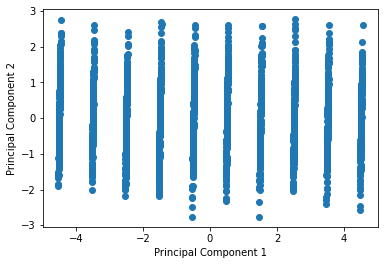

In [227]:
pca_x = pca.fit_transform(crime)
plt.scatter(pca_x[:,0], pca_x[:,1]);
plt.xlabel("Principal Component 1");
plt.ylabel("Principal Component 2");

### (6) Look at the loadings via `components_`
* put them in a panda dataframe with the original column headings as the headings
* transpose so that the rows are the features and the columns are the components
* convert the values to absolute values (remove the sign, we don't need it)
* sort by the (absolute) loadings in the first column

In [228]:
print(pca.components_[0])

[ 9.99787595e-01 -3.63377468e-04  2.10472022e-03  6.59695636e-05
 -1.70550759e-04  6.36307653e-05 -1.91991039e-06 -8.20157285e-05
  2.83122416e-04 -4.82259203e-04 -3.76674615e-03 -2.20300625e-04
  4.94441812e-03  3.93218663e-03  3.15348779e-03  9.37857986e-04
  1.45767537e-03 -3.35306248e-03 -3.69666468e-03 -1.03888848e-03
  3.02502015e-03  2.57445724e-03  2.70110118e-03  6.40526867e-04
  1.29125215e-03 -1.82711864e-04  1.80017397e-03  1.38651611e-03
 -5.57558967e-04 -3.59389347e-03 -2.33521963e-03 -2.96704083e-03
  2.04538535e-03 -2.75902224e-03  3.80136203e-03 -2.72478437e-03
 -3.94718765e-04 -4.40347169e-03  2.17185258e-03 -1.80149804e-03
 -1.17450732e-03 -1.26784442e-03 -1.58505555e-03  1.52693553e-03
  2.65827298e-03  2.38523937e-03  3.81839031e-03  1.39209126e-03
  1.16055172e-03  5.05881681e-04 -2.52719613e-04 -1.02233964e-03
  1.58938732e-04 -2.65811057e-03 -1.76770090e-03 -1.60290297e-03
 -1.17825198e-03 -1.00803786e-03 -6.19798665e-04 -5.90472686e-04
 -1.45106421e-04  2.37559

In [229]:
# Ordering the features by their coefficients in the equation of the first Principal Component
pca_1 = pca.components_[0] # First principal component
sort_array = np.argsort(np.abs(pca_1)) # Sorting the 'Indexes' of the pca_1 array from the lowest value to the highest
pca_1_highest_values = pca_1[sort_array][::-1][:10] # retrieve the 10 highest absolute values of the array pca_1

pca_1_cols_highest_values = crime.columns[sort_array][::-1][:10] # retrieving the names of the columns corresponding to the highest values

# Printing the result
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_1_cols_highest_values[i], pca_1_highest_values[i]))

The Column "fold" has a loading of : 0.9997875949410473
The Column "pctUrban" has a loading of : 0.0049444181236860535
The Column "PctOccupManu" has a loading of : -0.004403471688209665
The Column "RentHighQ" has a loading of : 0.004077954036517706
The Column "medIncome" has a loading of : 0.003932186626372573
The Column "PctYoungKids2Par" has a loading of : 0.0038183903133476977
The Column "PctEmploy" has a loading of : 0.003801362029039893
The Column "agePct65up" has a loading of : -0.003766746148663726
The Column "pctWPubAsst" has a loading of : -0.003696664678768389
The Column "PctPopUnderPov" has a loading of : -0.00359389347402973


### (7) Repeat with fold removed.

In [235]:
crime = crime.drop(columns=['fold'])
crime.head()

KeyError: "['fold'] not found in axis"

In [236]:
pca_clean = PCA(n_components=2).fit(crime)
pca_clean_x = pca_clean.transform(crime)

# Ordering the features by their coefficients in the equation of the first Principal Component
pca_1 = pca.components_[0] # First principal component
sort_array = np.argsort(np.abs(pca_1)) # Sorting the 'Indexes' of the pca_1 array from the lowest value to the highest
pca_1_highest_values = pca_1[sort_array][::-1][:10] # retrieve the 10 highest absolute values of the array pca_1

pca_1_cols_highest_values = crime.columns[sort_array][::-1][:10] # retrieving the names of the columns corresponding to the highest values

# Printing the result
for i in range(10):
    print('The Column "{}" has a loading of : {}'.format(pca_1_cols_highest_values[i], pca_1_highest_values[i]))

IndexError: index 100 is out of bounds for axis 0 with size 100

### (8)  plot the samples in the principal component space. Colour the points by ViolentCrimesPerPop.

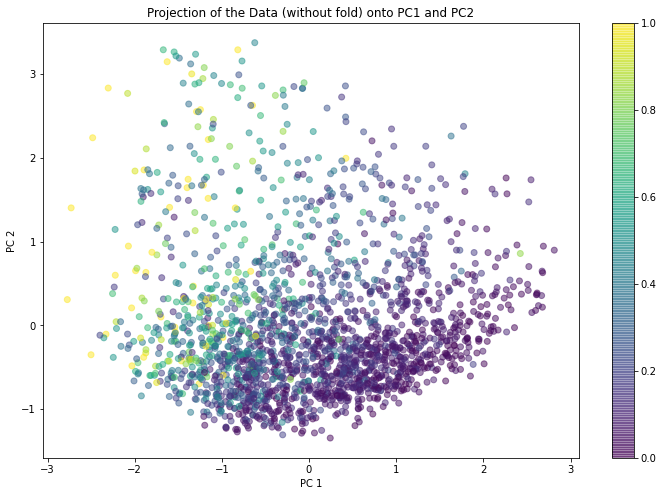

In [237]:
color_feature = 'ViolentCrimesPerPop' 

plt.figure(figsize=(12, 8))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Projection of the Data (without fold) onto PC1 and PC2')
plt.scatter(pca_clean_x[:,0], pca_clean_x[:,1], alpha = .5, c=crime[color_feature])
plt.colorbar();

# Exercise 2: Multidimensional scaling
### (1) Load the data

In [238]:
londonBorough = pd.read_excel('london-borough-profilesV2.xlsx')
londonBorough.head()

,Code,Area/INDICATOR,Inner/ Outer London,GLA Population Estimate 2013,GLA Household Estimate 2013,Inland Area (Hectares),Population density (per hectare) 2013,"Average Age, 2013","Proportion of population aged 0-15, 2013","Proportion of population of working-age, 2013",...,Teenage conception rate (2012),Life satisfaction score 2012-13 (out of 10),Worthwhileness score 2012-13 (out of 10),Happiness score 2012-13 (out of 10),Anxiety score 2012-13 (out of 10),Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,City of London,Inner London,8000,4514.371383,290.4,27.525868,41.303887,7.948036,77.541617,...,.,8.10,8.23,7.44,x,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,195600,73261.408580,3610.8,54.160527,33.228935,26.072939,63.835021,...,35.4,7.06,7.57,6.97,3.3,Lab,0,100,0,38.16
2,E09000003,Barnet,Outer London,370000,141385.794900,8674.8,42.651374,36.896246,20.886408,65.505593,...,14.7,7.35,7.79,7.27,2.63,Cons,50.7937,42.8571,1.5873,41.1
3,E09000004,Bexley,Outer London,236500,94701.226400,6058.1,39.044243,38.883039,20.282830,63.146450,...,25.8,7.47,7.75,7.21,3.22,Cons,71.4286,23.8095,0,not avail
4,E09000005,Brent,Outer London,320200,114318.553900,4323.3,74.063670,35.262694,20.462585,68.714872,...,19.6,7.23,7.32,7.09,3.33,Lab,9.52381,88.8889,1.5873,33


### (2) Extract numerical columns
Fill the NANs with the column mean and centralise them (subtract the column mean from each value)

In [239]:
# extract numerical columns and drop columns filled with NaNs
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1)


# fill NaNs with the mean
londonBorough_feat.fillna(value=londonBorough_feat.mean())

# centralise the data
londonBorough_feat = londonBorough_feat - londonBorough_feat.mean()

### (3) Compute a distance matrix of pairwise similarities

In [240]:
from sklearn.metrics import euclidean_distances
distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)

### (4) Use scikit-learn's MDS function to perform MDS on the data and project the points to a lower-dimensional space (using MDS's `fit_transform()`)

In [241]:
mds = MDS(n_components=2)
mds_x = mds.fit_transform(distMatrix)

/Users/Ayliah/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


### (5)Visualise the data on a 2D scatterplot and annotate the points using the borough names using the annotate function in matplotlib.

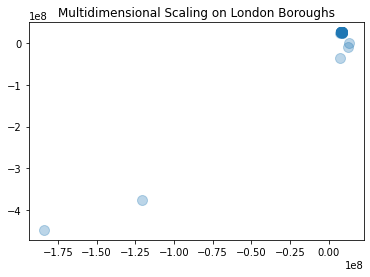

In [242]:
plt.scatter(mds_x[:, 0], mds_x[:, 1], alpha = .3, s=100);
plt.title('Multidimensional Scaling on London Boroughs');

# Exercise 3: Group wines based on their characteristics
### (1) Load the data, extract and store the features to use (start will all except the first columns - the first column is the known classes that we won't be using), and extract and store the known labels.

In [243]:
wine = pd.read_csv('wine.csv')
wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### (2) Use the k-means method to cluster the features into 3 clusters.

In [244]:
kmeans = KMeans(n_clusters=3).fit(wine)
wine['Cluster'] = kmeans.fit_predict(wine.iloc[:, 1:])
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### (3) Compare the known labels with the cluster labels

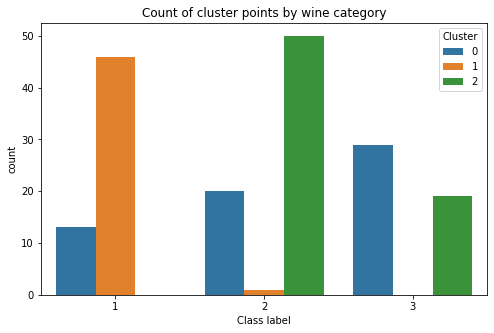

In [245]:
plt.figure(num=1, figsize=(8,5))
sns.countplot(x = 'Class label', hue = 'Cluster', data = wine)
plt.title('Count of cluster points by wine category');

### (4) plot the wines using consistent layouts such as PCA or MDS and colour the dots first by the known labels and then cluster the labels.

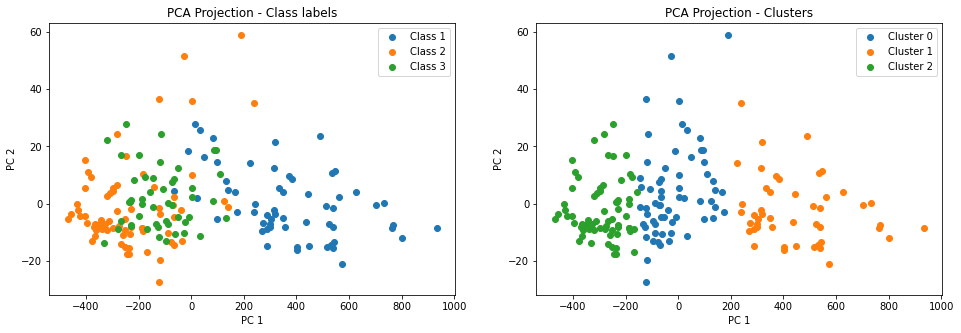

In [246]:
# Perform PCA
pca = PCA(n_components=2, random_state=123).fit(wine.iloc[:, 1:14]) # Keeping all columns except the first (class label) and the last (cluster number)
pca_x = pca.transform(wine.iloc[:, 1:14])

# Visualize dataset in 2D while coloring data points with Class label
plt.figure(num=3, figsize=(16,5))

plt.subplot(1,2,1)
for i in range(1, 4):
    plt.scatter(x = pca_x[wine['Class label']==i, 0],
                y = pca_x[wine['Class label']==i, 1], 
                label='Class {}'.format(i))

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection - Class labels')
plt.legend()

plt.subplot(1,2,2)
for i in range(0, 3):
    plt.scatter(x = pca_x[wine['Cluster']==i, 0],
                y = pca_x[wine['Cluster']==i, 1], 
                label='Cluster {}'.format(i))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Projection - Clusters')
plt.legend();

# Exercise 4: Cross-validation
### (1) load the load from exercise 1 and identify independent and dependent variables

In [247]:
independent=crime["medIncome"];
dependent = crime["ViolentCrimesPerPop"]

### (2) Use the code below to split your data using the k-fold approach. Where k=5, the data is split 5 times. In each split, a fifth used for testing and four fifths for training.

In [251]:
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np
    
kf = KFold(n_splits=5)
foldCount = 0
for train_idxs, test_idxs in kf.split(crime):
    print("Run: ", foldCount)
    print(len(crime),len(train_idxs),len(test_idxs))
    #put your code here
    foldCount += 1 

Run:  0
1994 1595 399
Run:  1
1994 1595 399
Run:  2
1994 1595 399
Run:  3
1994 1595 399
Run:  4
1994 1596 398


### (3) for each fold:
* Extract the test (unseen) and training subset
* Build a regression model on the training set and report its parameters.
* Plot
* Predict values for the test set
* Report the residuals

In [253]:
# extract the test and training subset
dependentSubset = dependent[train_idxs]
independentSubset = independent[train_idxs]
dependentSubsetUnseen = dependent[test_idxs]
independentSubsetUnseen = independent[test_idxs]

# build a regression model